In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Eulers method exercises

## Just rabbits

A return to the rabbits that are procreating without bound:

$\frac{dP}{dt}=\alpha P$

We solve the above to find that $P=Ce^{\alpha t}$

At $t=0$, say $P=100$. Then $100=C$:

If we set the units of t to days, then we need to calculate the increase in population each day: $\alpha=0.5/30$

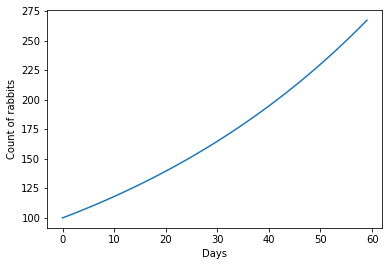

In [24]:
alpha = 0.5/30
t = np.arange(60)
P = 100*np.exp(alpha*t)

plt.xlabel('Days')
plt.ylabel('Count of rabbits')

plt.plot(t,P)
plt.show()

What if we had had no idea how to solve for P(t)? We still know that every day, the population $P$ becomes $P+(0.5/30)P$, so we should still be able to find this curve.

In [48]:
def rabbit_growth(P, alpha, time_start, time_stop, nsteps, trace = None):
    time_step = (time_stop-time_start)/nsteps
    if trace is None:
        trace = pd.DataFrame(data = [[time_start,P]])
    if time_start < time_stop:
        #calculate rate of change
        dPdt = alpha*P

        #calculate new baby rabbits during time step
        delta_P = dPdt * time_step

        #calculate new population
        P += delta_P
        
        #save trace
        trace = trace.append([[time_start + time_step, P]])
        
        #take next step
        trace = rabbit_growth(P, alpha, time_start + time_step, time_stop, time_step, trace = trace)
    
    trace.rename(columns={0:'t',1:'P'}, inplace=True)
    return trace

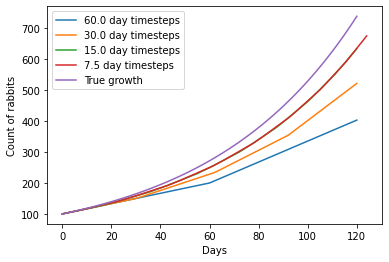

In [71]:
P=100
alpha = 0.5/30
time_start = 0
time_stop = 120

for n in 2**np.arange(1,5):
    step = (time_stop-time_start)/n
    output = rabbit_growth(P, alpha, time_start, time_stop, nsteps = n)
    
    plt.plot(output.t,output.P, label = '{} day timesteps'.format(step))
    
plt.xlabel('Days')
plt.ylabel('Count of rabbits')

t = np.linspace(time_start,time_stop,100)
P = 100*np.exp(alpha*t)
plt.plot(t,P, label = 'True growth')

plt.legend()
plt.show()

## Rabbits with limited resources

Now, let's say the rabbits live on a small island, and while they have no natural predators, there is some natural maximum rabbit population the island can sustain. As the rabbits near this limit, they will have to compete for resources, and their growth should slow:

$\frac{dR}{dt}=\alpha R \left(1-\frac{R}{L}\right)$

Notice that when $R$ is small, $\left(1-\frac{R}{L}\right)$ will be close to $1$, and the rate of change will behave like $\alpha R$. However, as R approaches L, $\left(1-\frac{R}{L}\right)$ will approach $0$, and thus $\frac{dR}{dt}$ will shrink.

You might recognize this is a logistic, but we'll again pretend we can't solve this directly.

In [83]:
def rabbit_island(R, alpha, L, time_start, time_stop, nsteps, trace = None):
    time_step = (time_stop-time_start)/nsteps
    if trace is None:
        trace = pd.DataFrame(data = [[time_start,R]])
    if time_start < time_stop:
        #calculate rate of change
        dRdt = alpha*R*(1-R/L)

        #calculate new baby rabbits during time step
        delta_R = dRdt * time_step

        #calculate new population
        R += delta_R
        
        #save trace
        trace = trace.append([[time_start + time_step, R]])
        
        #take next step
        trace = rabbit_island(R, alpha, L, time_start + time_step, time_stop, time_step, trace = trace)
    
    trace.rename(columns={0:'t',1:'R'}, inplace=True)
    return trace

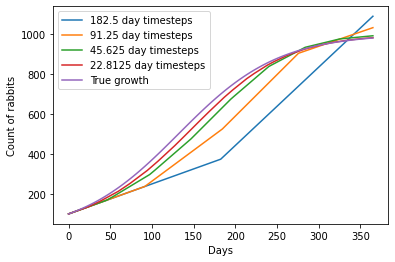

In [91]:
R=100
L=1_000
alpha = 0.5/30
time_start = 0
time_stop = 365

for n in 2**np.arange(1,5):
    step = (time_stop-time_start)/n
    output = rabbit_island(R, alpha, L, time_start, time_stop, nsteps = n)
    
    plt.plot(output.t,output.R, label = '{} day timesteps'.format(step))
    
plt.xlabel('Days')
plt.ylabel('Count of rabbits')

t = np.linspace(time_start,time_stop,100)
R_true = (R*L*np.exp(alpha*t))/(L-R+R*np.exp(alpha*t))
plt.plot(t,R_true, label = 'True growth')

plt.legend()
plt.show()